<a href="https://colab.research.google.com/github/kdmwangi/CODSOFT/blob/main/Titanic_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Model

<img src="https://esq.h-cdn.co/assets/16/16/1600x798/gallery-1460987104-titanic.JPG"/>

# **Import Statements**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

# **Data Exploration and Cleaning**

In [13]:
titanic_df = pd.read_csv('Titanic-Dataset.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# shape of the dataset
titanic_df.shape
print(f'has the shape {titanic_df.shape} with {titanic_df.shape[0]} rows and {titanic_df.shape[1]} columns')

has the shape (891, 12) with 891 rows and 12 columns


In [16]:
# the data type of the columns
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
# oldest and youngset passenger
print(f'youngest was {int(titanic_df["Age"].min() * 12)} months and the oldest was {int(titanic_df["Age"].max())} years')

youngest was 5 months and the oldest was 80 years


In [18]:
# average age of passengers
print(f'Average age of {int(titanic_df["Age"].mean())} years')

Average age of 29 years


In [19]:
# average fare
print(f'$ {int(titanic_df["Fare"].mean())} dollars')

$ 32 dollars


In [20]:
# check if there are duplicate values in the dataset
print(f'{titanic_df.duplicated().any()}')

False


In [21]:
# number of passengers
print(f'{titanic_df["PassengerId"].count()} passengers')

891 passengers


In [22]:
# null values and columns in the dataset

for col in titanic_df.columns:
  if titanic_df[f'{col}'].isna().any():
    print(f'{col} has {titanic_df[f"{col}"].isna().sum()} NaN values')

Age has 177 NaN values
Cabin has 687 NaN values
Embarked has 2 NaN values


In [23]:
titanic_df['Sex'] = titanic_df['Sex'].astype("category")
# titanic_df['Survived'] = titanic_df['Survived'].astype('category')
titanic_df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

# **Data Visualization**

In [24]:
titanic_df.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


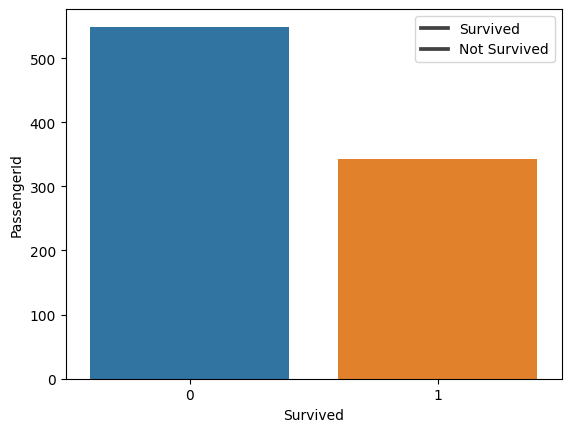

In [108]:
# a visual for survived and not survived in the titanic
sns.barplot(data = titanic_df, x='Survived',y=titanic_df.groupby('Survived').count()['PassengerId'])


In [26]:
titanic_df[titanic_df['Survived'] == True].groupby(by='Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,233,233,233,233,197,233,233,233,233,91,231
male,109,109,109,109,93,109,109,109,109,45,109


In [27]:
print(f"{titanic_df[['Sex','PassengerId']].groupby(by='Sex').count()}")

        PassengerId
Sex                
female          314
male            577


<Axes: xlabel='Sex', ylabel='count'>

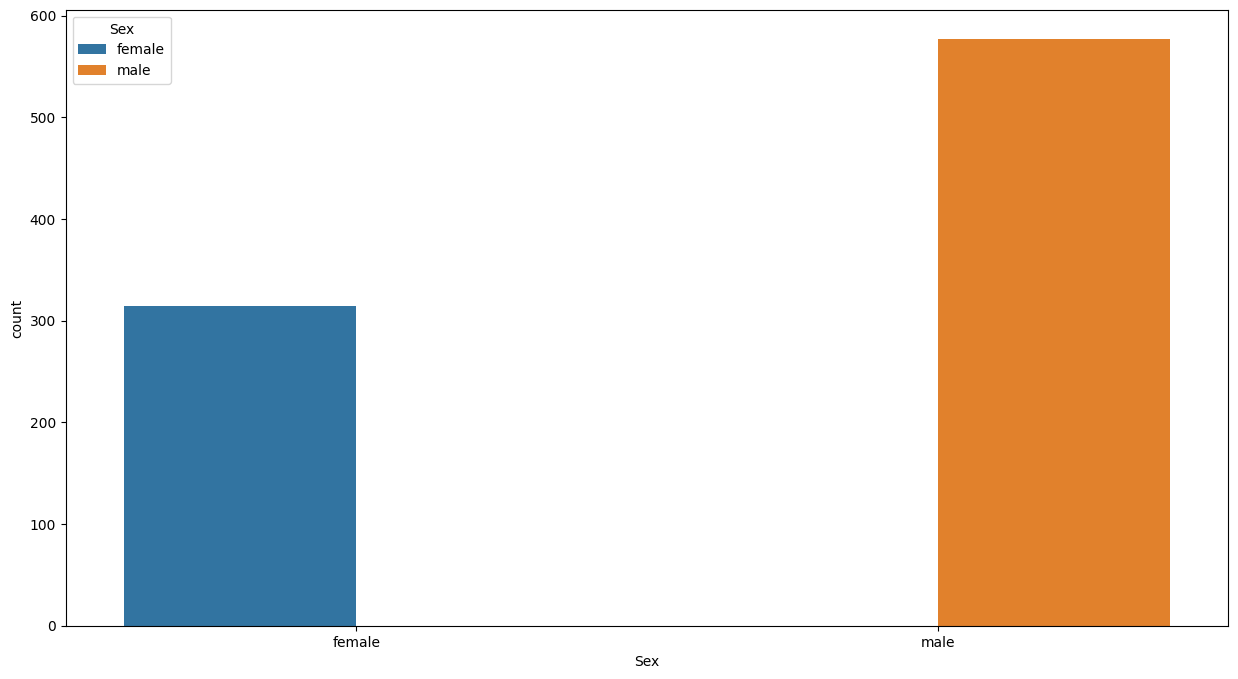

In [28]:
# a visualization of number women and men in the ship
plt.figure(figsize=(15,8))
sns.countplot(data=titanic_df, x="Sex", hue="Sex")

In [29]:
# comparison of total male and total female and the survived one for each group
# dt = titanic_df[['Sex','PassengerId','Survived']].groupby(by='Survived').count()
dt = titanic_df[(titanic_df['Survived'] == True)].groupby('Sex', as_index=False).count()
# dt
print(f"{dt['PassengerId'].loc[1]} out of  {titanic_df[titanic_df['Sex'] == 'male'].count()[0]} male survived ")
print(f"{dt['PassengerId'].loc[0]} out of  {titanic_df[titanic_df['Sex'] == 'female'].count()[0]} female survived ")

109 out of  577 male survived 
233 out of  314 female survived 


In [30]:

dt

,Sex,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,female,233,233,233,233,197,233,233,233,233,91,231
1,male,109,109,109,109,93,109,109,109,109,45,109


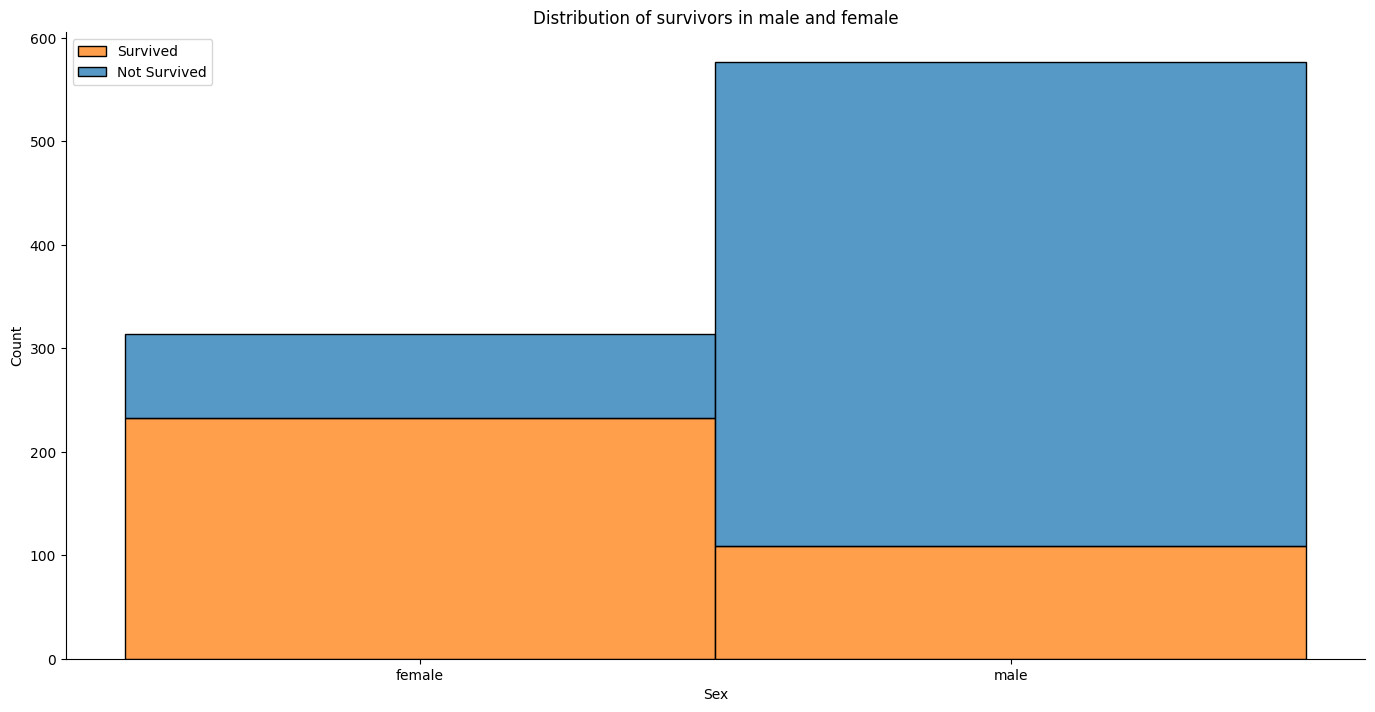

In [110]:
# create distribution plot to illustrate survival in both male and female
fig = sns.displot(titanic_df, x='Sex', hue='Survived', multiple='stack',height=7, aspect=2)
fig.set(title='Distribution of survivors in male and female')
plt.legend(labels=['Survived', 'Not Survived'])
fig._legend.remove()


In [34]:
# create a dataframe containing survivors only
# create a pie diagram for the dataset using plotly
survived = titanic_df[titanic_df['Survived'] == True].groupby('Sex', as_index=False).count()
survived

,Sex,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,female,233,233,233,233,197,233,233,233,233,91,231
1,male,109,109,109,109,93,109,109,109,109,45,109


In [42]:
fig = px.pie(survived, values='Survived', names='Sex', hole=.3,title='Gender % of survivors')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

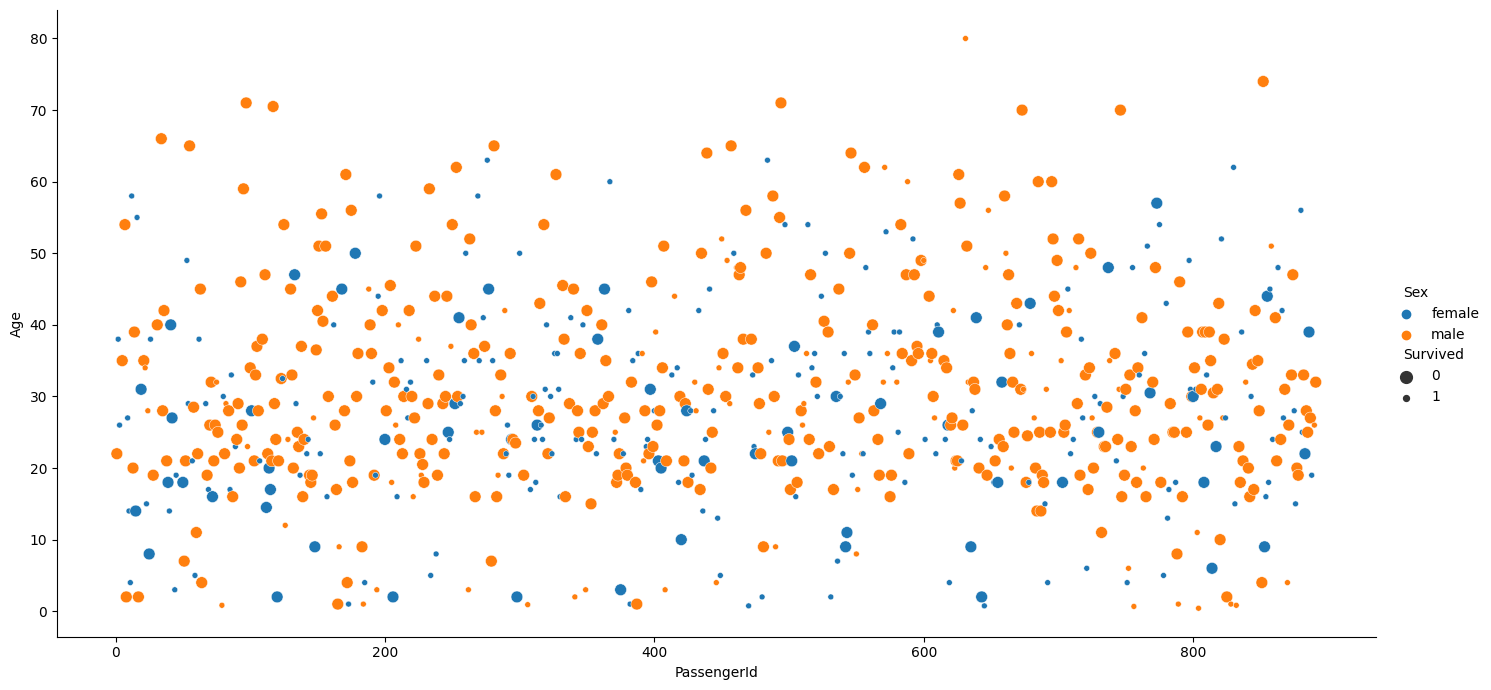

In [45]:
sns.relplot(titanic_df,x='PassengerId',y='Age',hue='Sex',height=7,aspect=2, size='Survived')

In [78]:
titanic_df[(titanic_df['Pclass'] == 2) & titanic_df['Survived'] == True].count()

PassengerId    87
Survived       87
Pclass         87
Name           87
Sex            87
Age            83
SibSp          87
Parch          87
Ticket         87
Fare           87
Cabin          13
Embarked       87
dtype: int64

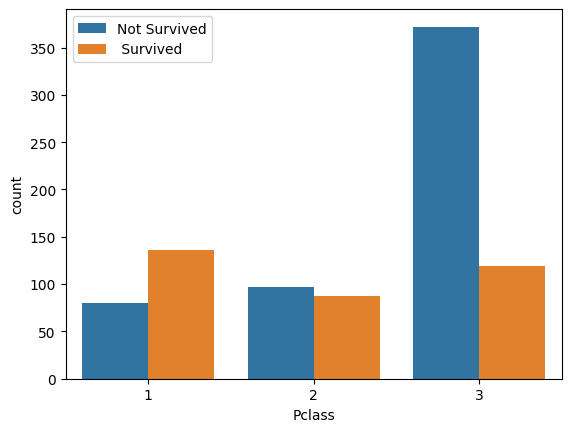

In [92]:
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')
# sns.relplot(titanic_df, x='Survived', y='Fare', col='Pclass')
# titanic_df.dtypes

fig = sns.countplot(titanic_df, x='Pclass',hue='Survived')
plt.legend(labels=['Not Survived',' Survived'])

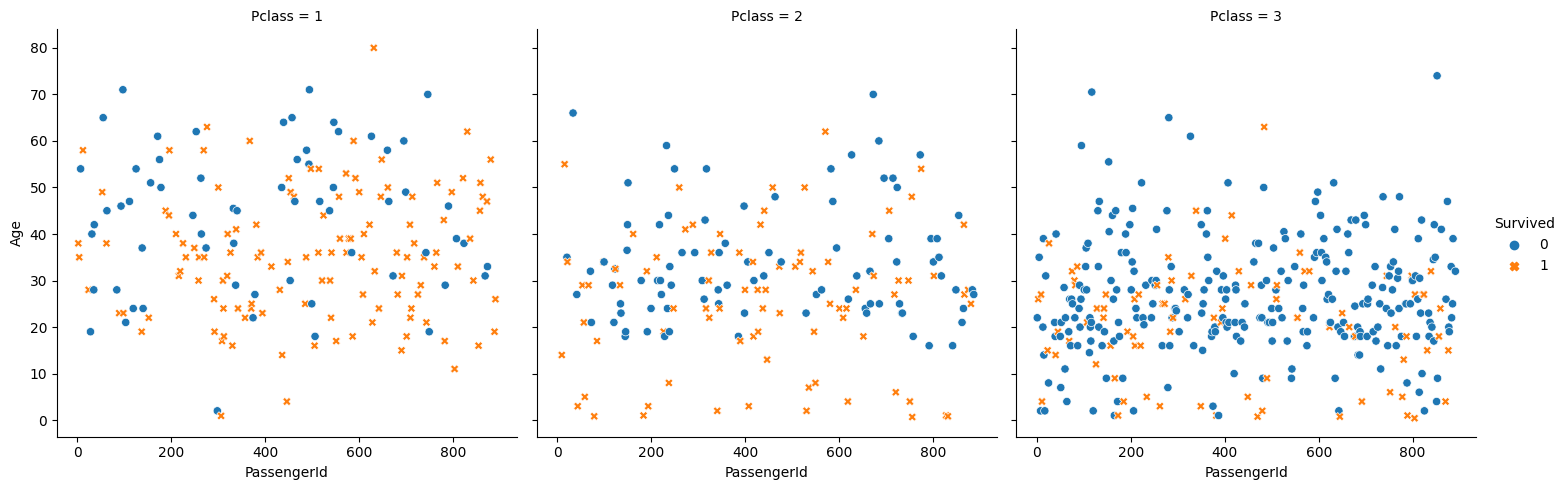

In [104]:
sns.relplot(titanic_df, x='PassengerId', y='Age',col='Pclass', hue='Survived', style='Survived')

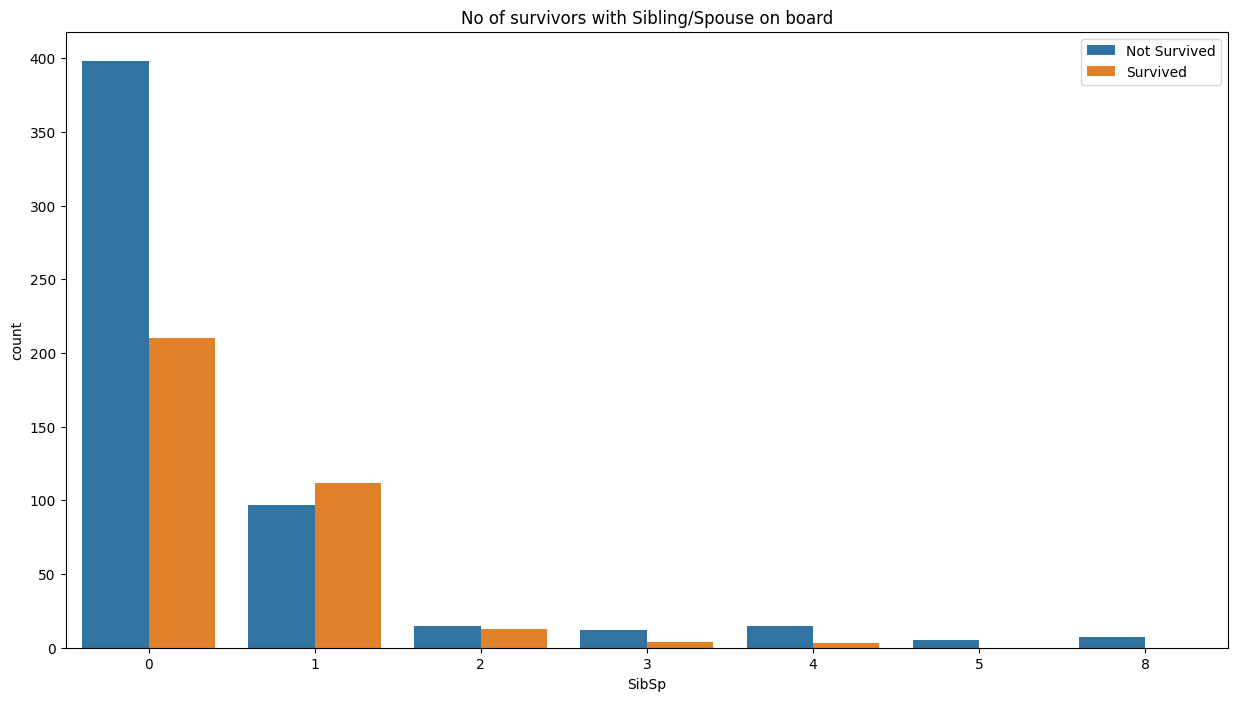

In [135]:
titanic_df['SibSp'] = titanic_df['SibSp'].astype('category')
plt.figure(figsize=(15,8))
fig= sns.countplot(titanic_df, x='SibSp', hue='Survived')
fig.set(title='No of survivors with Sibling/Spouse on board')
plt.legend(labels=['Not Survived','Survived'])

In [120]:
titanic_df[(titanic_df['Survived'] == True) & (titanic_df['Age'].isna())].count()

PassengerId    52
Survived       52
Pclass         52
Name           52
Sex            52
Age             0
SibSp          52
Parch          52
Ticket         52
Fare           52
Cabin          11
Embarked       52
dtype: int64

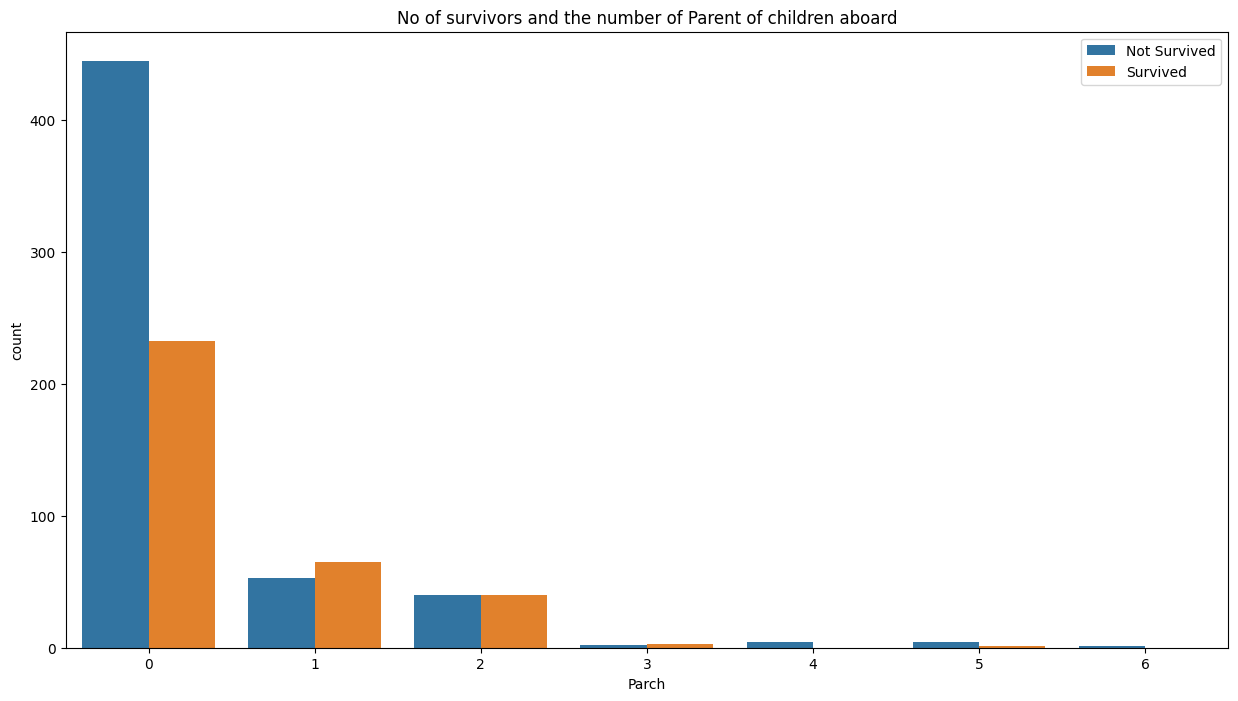

In [134]:
titanic_df['Parch'] = titanic_df['Parch'].astype('category')
titanic_df.dtypes
plt.figure(figsize=(15,8))

fig = sns.countplot(titanic_df, x='Parch', hue='Survived')
fig.set(title='No of survivors and the number of Parent of children aboard')
plt.legend(labels=['Not Survived', 'Survived'])

# **Model Training**